# Tarea Visión Artificial
### Integrantes: Álvaro Parker, Erick Bey y Matías Orozco.

### Librerias Generales necesarias

In [13]:
import cv2
import matplotlib.pyplot as plt

### Eliminación de Ruido (Filtro de la Mediana)

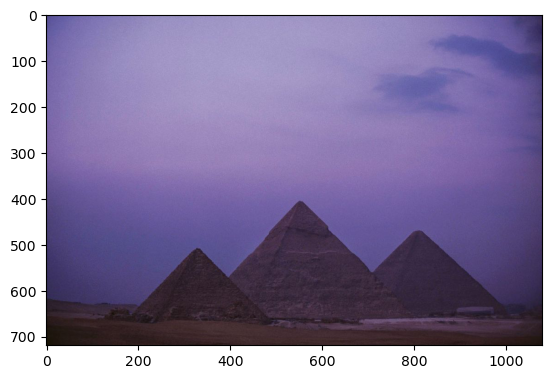

719 1080 3


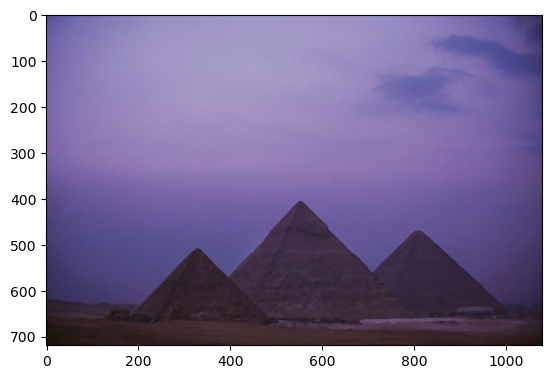

In [21]:
#lectura de imagen
img = cv2.imread("images/ruido.jpg")

#transformación a niveles de gris
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

#lectura de la imagen
m,n,ch = img_rgb.shape
print(m,n,ch)


#aplicamos el filtro
img_median = cv2.medianBlur(img_rgb,5)

cv2.imwrite('images/resultado_ruido.jpg',cv2.cvtColor(img_median, cv2.COLOR_BGR2RGB))
plt.imshow(img_median)
plt.show()

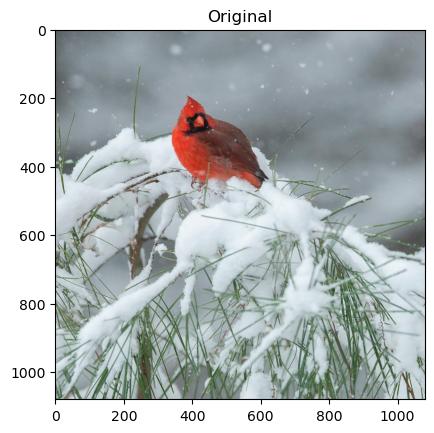

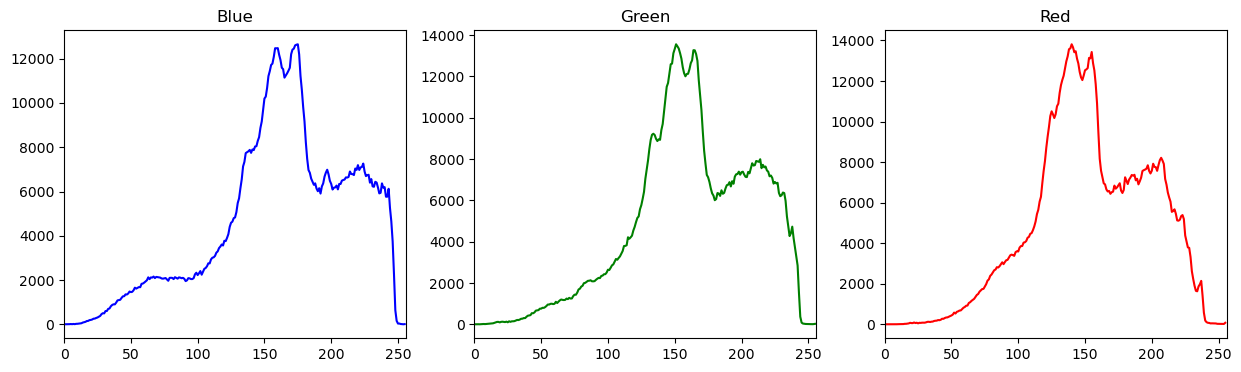

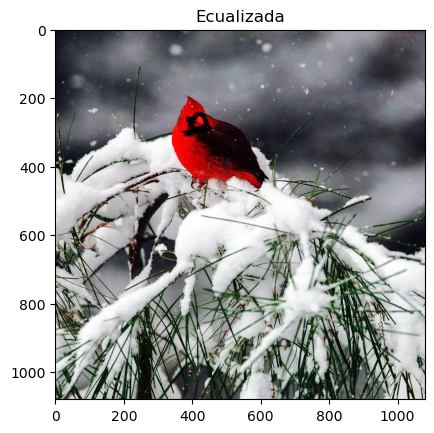

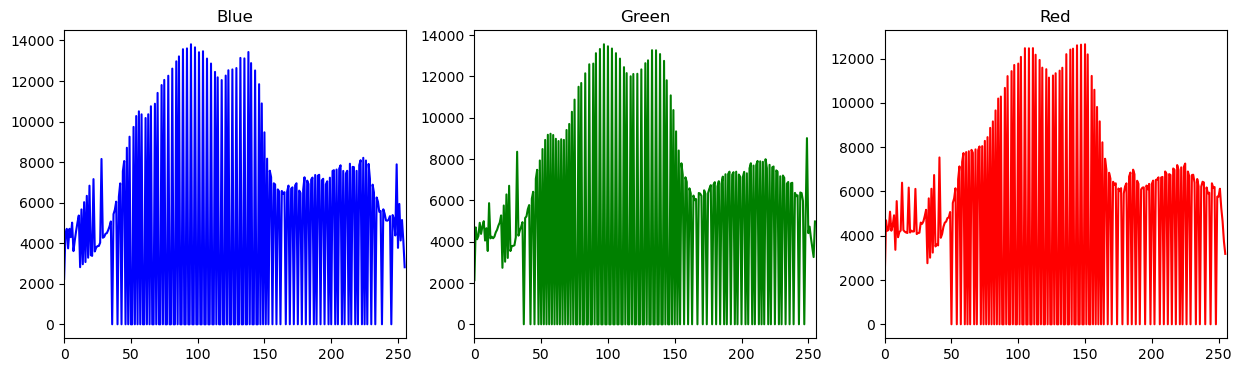

In [51]:
from ast import Eq
import numpy as np

#lectura de la imagen
img = cv2.imread('images/ecualizacion.jpg')
m,n,ch = img.shape

blue, green, red= cv2.split(img)

# Ecualizando los 3 colores por separado
eq_blue  = cv2.equalizeHist(blue)
eq_green = cv2.equalizeHist(green)
eq_red   = cv2.equalizeHist(red)

#seteamos el output para tres canales de tipo uint8
out = cv2.merge([eq_red, eq_green, eq_blue])

# imagen original
plt.imshow(img[:,:,[2,1,0]])
plt.title("Original")
plt.show()

#calculo de histograma originales
hist_blue = cv2.calcHist([img],[0],None,[256],[0,256])
hist_green = cv2.calcHist([img],[1],None,[256],[0,256])
hist_red = cv2.calcHist([img],[2],None,[256],[0,256])


plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.title("Blue")
plt.plot(hist_blue, 'b')
plt.xlim([0,256])

plt.subplot(1, 3, 2)
plt.title("Green")
plt.plot(hist_green, 'g')
plt.xlim([0,256])

plt.subplot(1, 3, 3)
plt.title("Red")
plt.plot(hist_red, 'r')
plt.xlim([0,256])

plt.show()

# Resultados
plt.imshow(out)
plt.title("Ecualizada")
plt.show()

#calculo de histograma originales
hist_blue = cv2.calcHist([out],[0],None,[256],[0,256])
hist_green = cv2.calcHist([out],[1],None,[256],[0,256])
hist_red = cv2.calcHist([out],[2],None,[256],[0,256])

plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.title("Blue")
plt.plot(hist_blue, 'b')
plt.xlim([0,256])

plt.subplot(1, 3, 2)
plt.title("Green")
plt.plot(hist_green, 'g')
plt.xlim([0,256])

plt.subplot(1, 3, 3)
plt.title("Red")
plt.plot(hist_red, 'r')
plt.xlim([0,256])

plt.show()

### Top-Hat y Binarización

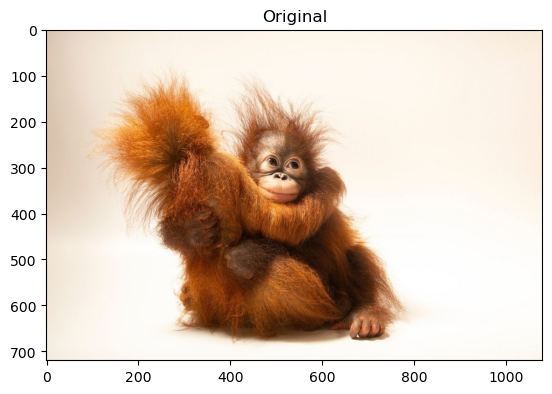

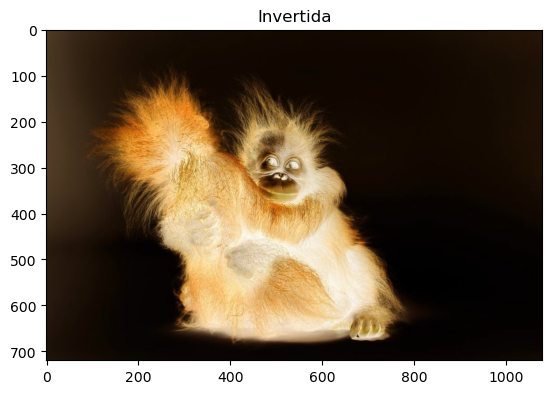

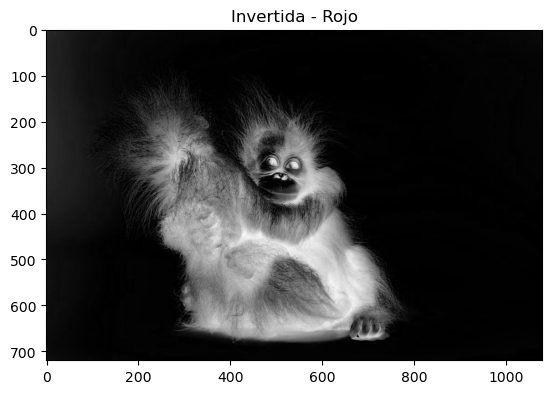

In [218]:
# Leer imagen
img = cv2.imread('images/tophat.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Imagen Original
plt.imshow(img_rgb)
plt.title('Original')
plt.show()

# Invertimos los colores de la imagen 
neg = 255 - img
plt.imshow(neg)
plt.title('Invertida')
plt.show()

# Separamos los canales utilizando la imagen negativa
blue, green, red = cv2.split(neg)

plt.imshow(red, cmap='gray')
plt.title('Invertida - Rojo')
plt.show()

#### Top-Hat: $A - (A \ominus B) \oplus B $

##### Definimos el kernel a utilizar

In [213]:
# MORPH_CROSS, MORPH_ELLIPSE, MORPH_RECT
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(10,10))
print(kernel)

[[1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]


##### Resolvemos la erosión para cada canal: $ A\ominus B $

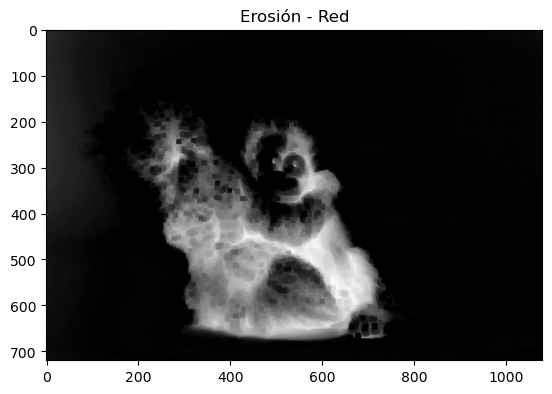

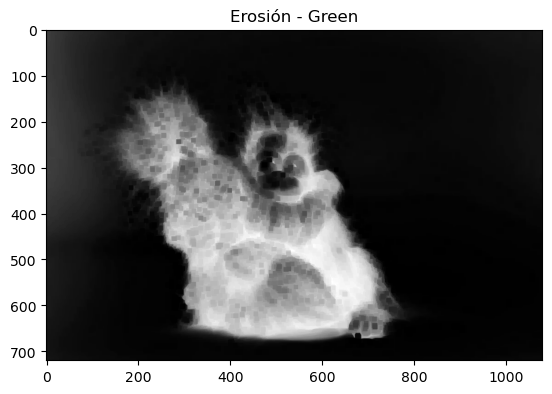

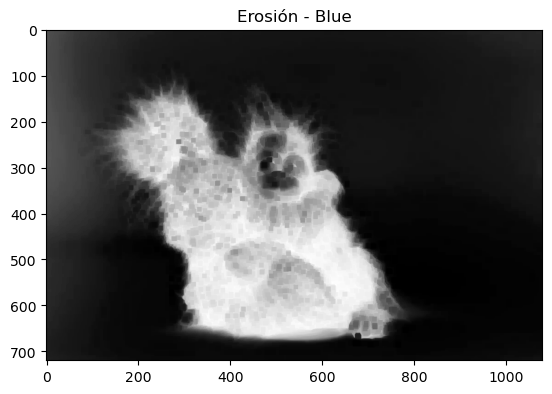

In [214]:
erosion_red = cv2.erode(red,kernel)
erosion_green = cv2.erode(green,kernel)
erosion_blue = cv2.erode(blue,kernel)

plt.imshow(erosion_red, cmap="gray")
plt.title('Erosión - Red')
plt.show()
plt.imshow(erosion_green, cmap="gray")
plt.title('Erosión - Green')
plt.show()
plt.imshow(erosion_blue, cmap="gray")
plt.title('Erosión - Blue')
plt.show()

#### Luego, al resultado anterior se le aplica dilatación: $ A' \oplus B $

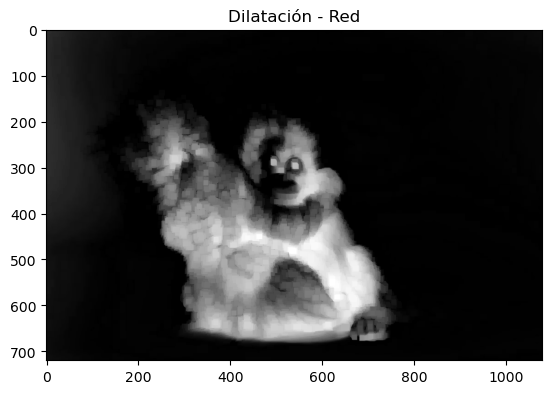

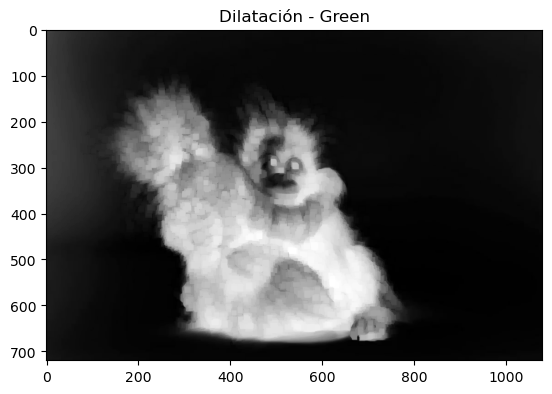

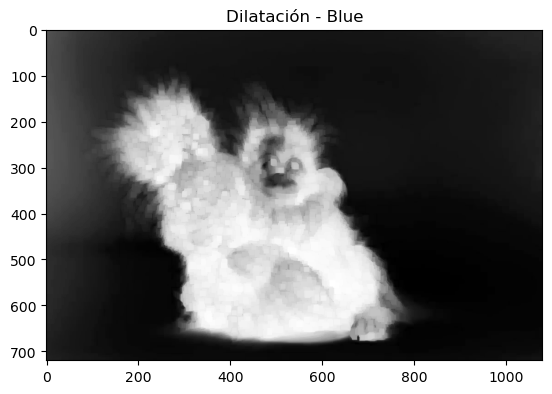

In [215]:
dilate_erosion_red = cv2.dilate(erosion_red,kernel)
dilate_erosion_green = cv2.dilate(erosion_green,kernel)
dilate_erosion_blue = cv2.dilate(erosion_blue,kernel)

plt.imshow(dilate_erosion_red, cmap="gray")
plt.title('Dilatación - Red')
plt.show()
plt.imshow(dilate_erosion_green, cmap="gray")
plt.title('Dilatación - Green')
plt.show()
plt.imshow(dilate_erosion_blue, cmap="gray")
plt.title('Dilatación - Blue')
plt.show()

##### Volvemos a unir los canales luego de aplicar la apertura y restamos con la imagen original en negativo. Al final volvemos a invertir todo para regresar a los colores originales

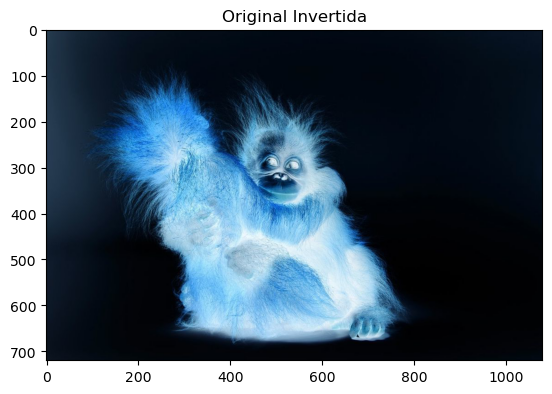

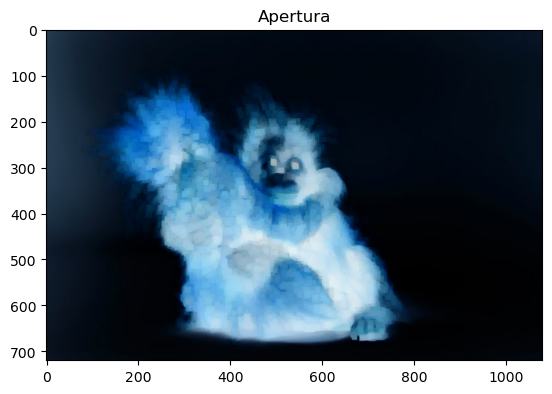

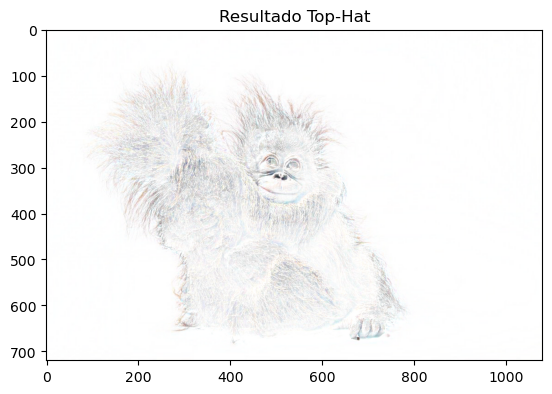

In [229]:

apertura = cv2.merge([dilate_erosion_blue, dilate_erosion_green, dilate_erosion_red])
out = cv2.subtract(neg,apertura)

plt.imshow(cv2.cvtColor(neg, cv2.COLOR_BGR2RGB))
plt.title('Original Invertida')
plt.show()

plt.imshow(cv2.cvtColor(apertura, cv2.COLOR_BGR2RGB))
plt.title('Apertura')
plt.show()

plt.imshow(255 - cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.title('Resultado Top-Hat')
plt.show()
